In [1]:
import numpy as np
import pandas as pandas
import tensorly as tl 
from tensorly.decomposition import parafac
from DataImport import tensorView, dataPlot

In [2]:
S, R, N, tensor = tensorView()

In [3]:
from tensorly.metrics.regression import variance as tl_var
import seaborn as sns
def R2X(reconstructed, original):
    """ Calculates R2X of two tensors. """
    return 1.0 - tl_var(reconstructed - original) / tl_var(original)

In [12]:
#antigen by component -- factors[0]
#patient by component -- factors[1]
#receptor by component -- factors[2]
from tensorly.cp_tensor import cp_to_tensor
def cp_decomp(tensor, rank):
    weights, factors = parafac(tensor, rank, tol=1e-15, n_iter_max=2000)
    recon_tensor = R2X(cp_to_tensor((weights, factors), mask=None), tensor)
    return factors, recon_tensor

<AxesSubplot:>

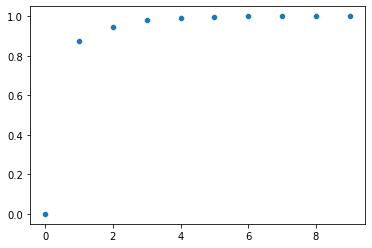

In [14]:
cp_r2x = np.zeros(10)
comps = range(1, len(cp_r2x))
for i in comps:
    cp_r2x[i] = cp_decomp(tensor, i)[1]
sns.scatterplot(np.arange(len(cp_r2x)), cp_r2x)

In [2]:
from dataImport import tensorView
#from tfac import cp_decomp
from figureCommon import subplotLabel, getSetup
from figure1 import makeFigure, R2X_plot
S, R, N, tensory = tensorView()
makeFigure()

ModuleNotFoundError: No module named 'dataImport'